# Bootstrap Example

To understand the bootstrap approach a little better, let us return to the simple linear regression example from the lecture.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1.2,1.7,2.4,3.3,4.1,4.8,5.6,7.2,8.4,9.1])
y = np.array([3.2,3.7,4.2,4.6,4.9,5.1,5.6,5.9,6.1,6.4])

We can find the ordinary least squares (OLS) maximum likelihood estimate. We could use one of the libraries, or build our own regressor.

In [11]:
def fit_parameters(x,y):
  #Fit OLS 1st order polynomial (straight-line)
  X = np.c_[x,np.ones_like(x)]
  return np.linalg.inv(X.T@X) @ X.T @ y

w = fit_parameters(x,y)

In [12]:
np.ones_like([1,2,3])

array([1, 1, 1])

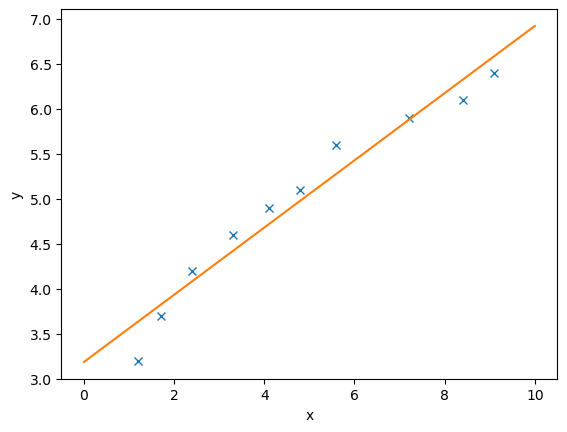

In [13]:
plt.plot(x,y,'x')
plt.xlabel('x')
plt.ylabel('y')
plt.plot([0,10],[w[1],w[1]+w[0]*10])

This is fine, but it doesn't give us a sense of our uncertainty, or what the model can or can't predict.

## Bootstrap Question 1

Using `np.random.choice`, resample 100 times (with replacement) from x and y, and compute the parameters for each of these resampled datasets. Return a $100 \times 2$ numpy array of these parameters.

In [14]:
def bootstrap(x,y):
  #Add code here [answer at end of the notebook!]
  wm = []
  for i in range(100):
    ind = np.random.choice(len(x),len(y))
    w = fit_parameters(x[ind],y[ind])
    wm.append(w)
  return np.array(wm)
  

In [9]:
k = np.random.choice(len(x),len(y))
print(k)

[4 6 7 1 2 4 8 9 0 6]


Using this method, we can plot the range of likely parameters, and plot likely predictions.

Text(0, 0.5, 'Offset')

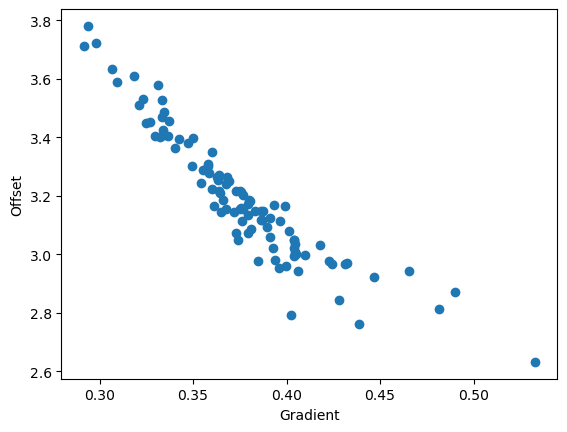

In [15]:
ws = bootstrap(x,y)
plt.scatter(ws[:,0],ws[:,1])
plt.xlabel('Gradient')
plt.ylabel('Offset')

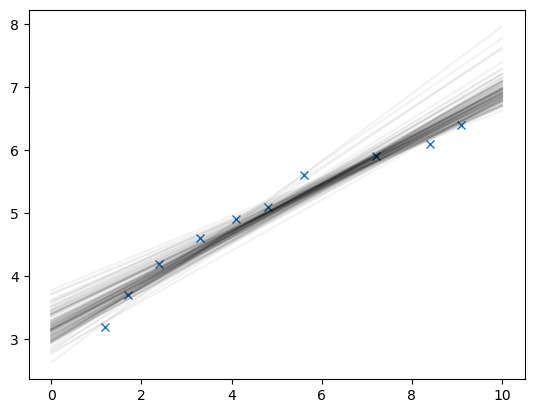

In [16]:
plt.plot(x,y,'x')
for w in ws:
  plt.plot([0,10],[w[1],w[1]+w[0]*10],'k-',alpha=0.05)

Let's now apply it to regression trees!

This is the simplest example in which we have one continous input and one continous output. We just have a single decision node. This turns out not to be able to represent the data very well...

## Bootstrap Question 2

In [ ]:
def get_split(x,y):
  #This finds the threshold value to use, to minimise the weighted sum of variances between the two sub-nodes.
  #It returns this threshold and the means of the two sub-nodes, in an array of Nx3 (N resamples) with the first
  #column equal to the threshold split point, the second row the mean of the points left of the split, and the
  #third row the mean of the points to the right of the split.

  #Code here [answer at end of notebook!]

In [ ]:
def bootstrap_trees(x,y):
  # Run the bootstrap algorithm to make splits on bootstrap subsets of the data. Store the results of each in 'parameters'
  parameters = []
  for it in range(500):
    indices = np.random.choice(len(x),len(x))
    split, left_mean, right_mean = get_split(x[indices],y[indices])
    parameters.append([split,left_mean,right_mean])
  return np.array(parameters)

In [ ]:
parameters = bootstrap_trees(x,y)

In [ ]:
# Plot these predictions
for param in parameters:
  plt.plot([0,param[0],param[0],10],[param[1],param[1],param[2],param[2]],'k-',alpha=0.1)
plt.plot(x,y,'x')

In [ ]:
#here we plot the 95% CI:
pred_x = np.linspace(0,10,100)
v = [np.mean(np.r_[parameters[p<parameters[:,0],1],parameters[p>=parameters[:,0],2]]) for p in pred_x]
lowerCI = [np.percentile(np.r_[parameters[p<parameters[:,0],1],parameters[p>=parameters[:,0],2]],2.5) for p in pred_x]
upperCI = [np.percentile(np.r_[parameters[p<parameters[:,0],1],parameters[p>=parameters[:,0],2]],97.5) for p in pred_x]
plt.plot(pred_x,v)
plt.plot(pred_x,lowerCI,'r-')
plt.plot(pred_x,upperCI,'r-')
plt.plot(x,y,'x')

# Answers

In [ ]:
#Question 1:

def bootstrap(x,y):
  ws = []
  for it in range(100):
    indices = np.random.choice(len(x),len(x))
    w = fit_parameters(x[indices],y[indices])
    ws.append(w)
  return np.array(ws)

# Question 2:
def get_split(x,y):
  #This finds the threshold value to use, to minimise the weighted sum of variances between the two sub-nodes.
  #It returns this threshold and the means of the two sub-nodes, in an array of Nx3 (N resamples) with the first
  #column equal to the threshold split point, the second row the mean of the points left of the split, and the
  #third row the mean of the points to the right of the split.

  minimum_var = np.inf
  minimum_threshold = np.NaN
  for threshold in np.linspace(0,10,100):
    weighted_sum_of_variance = np.var(y[y<threshold])*np.sum(y<threshold)+np.var(y[y>=threshold])*np.sum(y>=threshold)
    if weighted_sum_of_variance<minimum_var:
      minimum_var = weighted_sum_of_variance
      minimum_threshold = threshold
  return minimum_threshold, np.mean(y[y<minimum_threshold]), np.mean(y[y>=minimum_threshold])